In [2]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

from power.ml_ops.data import get_pv_data, clean_pv_data


# Notebook of Marius

## Get and clean data

In [3]:
pv_df = pd.read_csv('../raw_data/1980-2022_pv.csv')
pv_df.head(2)

,Unnamed: 0.1,Unnamed: 0,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature,source
0,0,315532800000,1980-01-01 01:00:00+01:00,0.0,0.0,0.0,-1.296,data/pv_data/1980_pv.csv
1,1,315536400000,1980-01-01 02:00:00+01:00,0.0,0.0,0.0,-1.216,data/pv_data/1980_pv.csv


In [4]:
x = pv_df.loc[0,'local_time']
print('x: ', x)
#dt.datetime.strptime("21 June, 2018", "%d %B, %Y")
dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z")

x:  1980-01-01 01:00:00+01:00


datetime.datetime(1980, 1, 1, 1, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))

In [5]:
# load data
pv_df = pd.read_csv('../raw_data/1980-2022_pv.csv')

# drop columns
pv_df.drop(columns=['irradiance_direct','irradiance_diffuse','temperature',
                    'source','Unnamed: 0.1'], inplace=True)

# convert dtypes
pv_df.electricity = pv_df.electricity.astype(float)

#pv_df.local_time    = pd.to_datetime(pv_df.local_time) #
pv_df.local_time    = pv_df.local_time.apply(lambda x:
                                            dt.datetime.strptime(x,
                                            "%Y-%m-%d %H:%M:%S%z"))


pv_df['Unnamed: 0'] = pd.to_datetime(pv_df['Unnamed: 0'], unit='ms').dt.tz_localize('UTC')

# name columns
pv_df.rename(columns={'Unnamed: 0': 'utc_time'}, inplace=True)

# show
pv_df.head(2)

,utc_time,local_time,electricity
0,1980-01-01 00:00:00+00:00,1980-01-01 01:00:00+01:00,0.0
1,1980-01-01 01:00:00+00:00,1980-01-01 02:00:00+01:00,0.0


In [6]:
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376944 entries, 0 to 376943
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   utc_time     376944 non-null  datetime64[ns, UTC]
 1   local_time   376944 non-null  object             
 2   electricity  376944 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 8.6+ MB


In [7]:
pv_df.tail(2)

,utc_time,local_time,electricity
376942,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+01:00,0.0
376943,2022-12-31 23:00:00+00:00,2023-01-01 00:00:00+01:00,0.0


In [8]:
# unique dates match the df length
print('pv_df number of rows: ', pv_df.shape[0])
print('Number of unique values:')
pv_df.nunique()

pv_df number of rows:  376944
Number of unique values:


utc_time       376944
local_time     376944
electricity       892
dtype: int64

In [9]:
# There are no NA values
pv_df.isna().sum()

utc_time       0
local_time     0
electricity    0
dtype: int64

In [10]:
print('Number of negative electricity values: ', len(pv_df[pv_df.electricity < 0.0]))
print('Number of electricity values above max. capacity (1 kw): ', len( pv_df[pv_df.electricity > 1.0]))

Number of negative electricity values:  0
Number of electricity values above max. capacity (1 kw):  0


In [11]:
def get_pv_data() -> pd.DataFrame:
    """
    Load raw data from local directory
    """
    df = pd.read_csv('../raw_data/1980-2022_pv.csv')
    print('# data loaded')
    return df


In [12]:
def clean_pv_data(pv_df: pd.DataFrame) ->pd.DataFrame:
    """
    Remove unnecessary columns and convert to right dtypes
    """
    # remove unnevessary columns
    pv_df.drop(columns=['irradiance_direct','irradiance_diffuse','temperature',
                    'source','Unnamed: 0.1'], inplace=True)

    # convert dtypes
    pv_df.electricity = pv_df.electricity.astype(float)

    pv_df.local_time    = pv_df.local_time.apply(lambda x:
                                            dt.datetime.strptime(x,
                                            "%Y-%m-%d %H:%M:%S%z")) # pd.to_datetime gives warning

    pv_df['Unnamed: 0'] = pd.to_datetime(pv_df['Unnamed: 0'],
                                         unit='ms').dt.tz_localize('UTC')
    # correct column names
    pv_df.rename(columns={'Unnamed: 0': 'utc_time'}, inplace=True)

    print('# data cleaned')
    return pv_df

In [13]:
df = get_pv_data()
df = clean_pv_data(df)
df.head()

# data loaded
# data cleaned


,utc_time,local_time,electricity
0,1980-01-01 00:00:00+00:00,1980-01-01 01:00:00+01:00,0.0
1,1980-01-01 01:00:00+00:00,1980-01-01 02:00:00+01:00,0.0
2,1980-01-01 02:00:00+00:00,1980-01-01 03:00:00+01:00,0.0
3,1980-01-01 03:00:00+00:00,1980-01-01 04:00:00+01:00,0.0
4,1980-01-01 04:00:00+00:00,1980-01-01 05:00:00+01:00,0.0


## Select years

In [14]:
df = get_pv_data()
df = clean_pv_data(df)
df.head(2)

# data loaded
# data cleaned


,utc_time,local_time,electricity
0,1980-01-01 00:00:00+00:00,1980-01-01 01:00:00+01:00,0.0
1,1980-01-01 01:00:00+00:00,1980-01-01 02:00:00+01:00,0.0


In [15]:
st = 1980
en = 1980

start = "1980-01-01 00:00:00"
end   = "1982-12-31 23:00:00"
part_df = df[df.utc_time.between(start, end)]

print(part_df.head(1))
print(part_df.tail(1))

                   utc_time                 local_time  electricity
0 1980-01-01 00:00:00+00:00  1980-01-01 01:00:00+01:00          0.0
                       utc_time                 local_time  electricity
26303 1982-12-31 23:00:00+00:00  1983-01-01 00:00:00+01:00          0.0


In [16]:
def select_years(df: pd.DataFrame, start=1980, end=1982)-> pd.DataFrame:
    """
    Returns the df between start and end year (inclusive)
    """
    start_point = f"{start}-01-01 00:00:00"
    end_point   = f"{end}-12-31 23:00:00"
    df = df[df.utc_time.between(start_point, end_point)]

    n_years = df['utc_time'].dt.year.nunique()
    print(f"# selected {n_years} years")

    return df


In [17]:
test_df = select_years(df, start=1980, end=1983)


# selected 4 years


In [18]:
test_df.head(2)

,utc_time,local_time,electricity
0,1980-01-01 00:00:00+00:00,1980-01-01 01:00:00+01:00,0.0
1,1980-01-01 01:00:00+00:00,1980-01-01 02:00:00+01:00,0.0


In [19]:
test_df.tail(2)

,utc_time,local_time,electricity
35062,1983-12-31 22:00:00+00:00,1983-12-31 23:00:00+01:00,0.0
35063,1983-12-31 23:00:00+00:00,1984-01-01 00:00:00+01:00,0.0


## Create statitics df

In [20]:
years_df = select_years(df, start=1980, end=1982)

years_df['hour_of_year'] = years_df.utc_time.\
                           apply(lambda x: x.strftime("%m%d%H"))

stats_df = years_df[['hour_of_year', 'electricity']]\
    .groupby(['hour_of_year']).agg(['mean','median','std','skew','min','max'])


# selected 3 years


/var/folders/b1/83z4ln8j1yd088xz1fgkbd2c0000gn/T/ipykernel_18800/589407169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_df['hour_of_year'] = years_df.utc_time.\


In [21]:
def statistic_table(years_df: pd.DataFrame) -> pd.DataFrame:

    years_df = years_df.copy()
    years_df['hour_of_year'] = years_df.utc_time.\
                           apply(lambda x: x.strftime("%m%d%H"))

    stats_df = years_df[['hour_of_year', 'electricity']]\
    .groupby(['hour_of_year']).agg(['mean','median','std','skew','min','max'])

    print('# calculated statistics for every hour of the year')

    return stats_df

In [22]:

years_df = select_years(df, start=1980, end=1982)
stats_df = statistic_table(years_df)

# selected 3 years
# calculated statistics for every hour of the year


<Axes: xlabel='hour_of_year'>

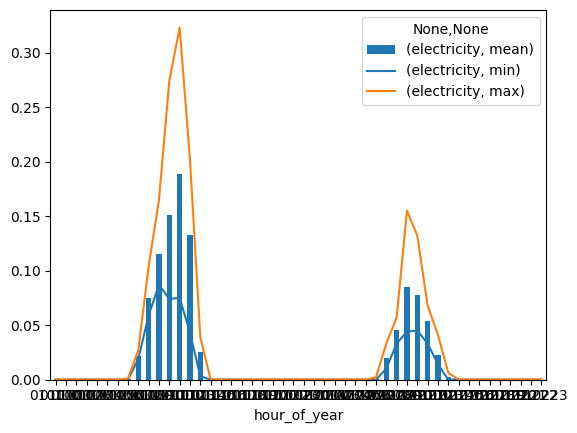

In [23]:
fig, ax = plt.subplots()
stats_df.loc['010100':'010223',(['electricity'], ['mean'])].plot(kind='bar',
                                                                 ax=ax,)
stats_df.loc['010100':'010223',(['electricity'], ['min','max'])].plot(ax=ax)

## Baseline model mean

In [24]:
years_df = select_years(df, start=1980, end=1982)
stats_df = statistic_table(years_df)

# selected 3 years
# calculated statistics for every hour of the year


In [ ]:
def model_yesterday(X: pd.DataFrame, input_date: str) -> pd.DataFrame:
    """
    Returns a simple previous day model
    Input:
     - a clean DataFrame
     - a date with format: "YEAR-MONTH-DAY HOUR:MIN:SECONDS"
    Returns:
     - A dataFrame with the power production from the previous day
    """
    input_timestamp = pd.Timestamp(input_date, tz='UTC')
    idx = X[X.utc_time == input_timestamp].index[0]
    if idx <= 24:
        return X.iloc[0:idx,:]
    return X.iloc[idx-24:idx,:]

In [25]:
input_date = '2000-05-15 01:00:00' # "YEAR-MONTH-DAY HOUR:MIN:SECONDS"
input_timestamp = pd.Timestamp(input_date, tz='UTC')
input_timestamp

Timestamp('2000-05-15 01:00:00+0000', tz='UTC')

In [29]:
type(input_timestamp)
input_timestamp + pd.Timedelta(hours=20)

Timestamp('2000-05-15 21:00:00+0000', tz='UTC')

In [30]:
pd.date_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [62]:
next24 = pd.date_range(
            start=input_timestamp,
            end=  input_timestamp + pd.Timedelta(hours=23),
            freq=pd.Timedelta(hours=1)).to_frame(index=False, name='utc_time')


In [63]:
#next24 = next24.to_frame(index=False, name='utc_time')
next24['hour_of_year'] = next24.utc_time.\
                           apply(lambda x: x.strftime("%m%d%H"))


In [64]:
stats_df = statistic_table(years_df)
stats_df.columns = stats_df.columns.droplevel(level=0)


# calculated statistics for every hour of the year


In [72]:
print(input_date)
stats_pred = next24.join(stats_df, on='hour_of_year', how='inner', validate='one_to_one')
stats_pred

2000-05-15 01:00:00


,utc_time,hour_of_year,mean,median,std,skew,min,max
0,2000-05-15 01:00:00+00:00,051501,0.000000,0.000,0.000000,0.000000,0.000,0.000
1,2000-05-15 02:00:00+00:00,051502,0.000000,0.000,0.000000,0.000000,0.000,0.000
2,2000-05-15 03:00:00+00:00,051503,0.002000,0.002,0.000000,0.000000,0.002,0.002
3,2000-05-15 04:00:00+00:00,051504,0.036667,0.038,0.004163,-1.293343,0.032,0.040
4,2000-05-15 05:00:00+00:00,051505,0.114667,0.116,0.003215,-1.545393,0.111,0.117
5,2000-05-15 06:00:00+00:00,051506,0.299667,0.296,0.009074,1.521492,0.293,0.310
6,2000-05-15 07:00:00+00:00,051507,0.484333,0.491,0.016073,-1.545393,0.466,0.496
7,2000-05-15 08:00:00+00:00,051508,0.624333,0.633,0.016773,-1.704387,0.605,0.635
8,2000-05-15 09:00:00+00:00,051509,0.714000,0.716,0.015100,-0.585583,0.698,0.728
9,2000-05-15 10:00:00+00:00,051510,0.762333,0.768,0.017214,-1.320805,0.743,0.776


In [74]:
stats_pred.drop(columns='hour_of_year', inplace=True)
stats_pred.shape

(24, 7)

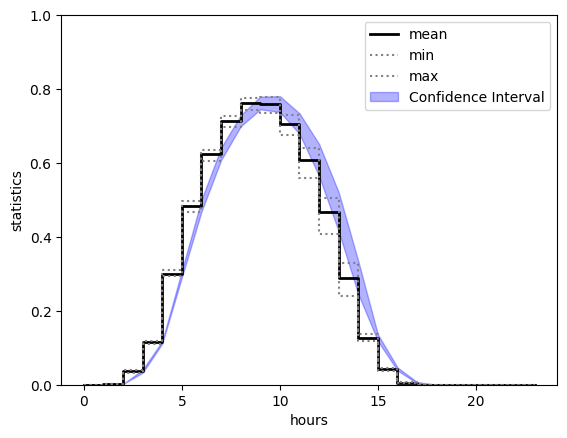

In [103]:
#plt.plot(stats_pred.mean)
fig, ax = plt.subplots()

ax.step(stats_pred.index, stats_pred['mean'].values,
        color='k',
        linewidth='2',
        label='mean')

ax.step(stats_pred.index, stats_pred['min'].values,
        color='gray',
        linestyle=':',
        label='min')

ax.step(stats_pred.index, stats_pred['max'].values,
        color='gray',
        linestyle=':',
        label='max')

#ax.bar(stats_pred.index, stats_pred['std'].values,
#        color='gray',
#        label='std')

lower_bound = stats_pred['mean'].values - stats_pred['std'].values
upper_bound = stats_pred['mean'].values + stats_pred['std'].values
ax.fill_between(stats_pred.index, lower_bound, upper_bound, color='blue', alpha=0.3, label='Confidence Interval')


ax.set_xlabel('hours')
ax.set_ylabel('statistics')
ax.set_ylim(0,1)
ax.legend()

#stats_pred['mean'].values
#stats_pred['mean'].index

In [ ]:
lower_bound = stats_pred['mean'].values - stats_pred['std'].values
upper_bound = stats_pred['mean'].values + stats_pred['std'].values
ax.fill_between(x, lower_bound, upper_bound, color='blue', alpha=0.3, label='Confidence Interval')
